In [4]:
# 1. 환경 설정 및 데이터 로드
!pip install koreanize-matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

print("라이브러리 로드 완료")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.3 MB/s eta 0:00:00
라이브러리 로드 완료


In [5]:
# 2. 데이터 읽기
# df = pd.read_csv('/content/Hufs_Syllabus_Data.csv')
file_path = 'Hufs_Syllabus_Data.csv' # 실제 파일 경로로 수정 필요
df = pd.read_csv(file_path)

# 2.1 데이터 크기, 칼럼, 타입 확인
print(f"데이터 크기 (행, 열): {df.shape}")
print("\n[칼럼 정보]")
df.info()

print("\n[데이터 상위 5개]")
display(df.head())

데이터 크기 (행, 열): (100, 8)

[칼럼 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FileName           100 non-null    object
 1   CourseTitle        100 non-null    object
 2   Classification     98 non-null     object
 3   CourseDescription  100 non-null    object
 4   AssignmentScore    100 non-null    int64 
 5   EtcScore           100 non-null    int64 
 6   TeachingMethods    100 non-null    object
 7   OtherNotes         97 non-null     object
dtypes: int64(2), object(6)
memory usage: 6.4+ KB

[데이터 상위 5개]


,FileName,CourseTitle,Classification,CourseDescription,AssignmentScore,EtcScore,TeachingMethods,OtherNotes
0,wis.hufs.ac.kr_src08_jsp_lecture_syllabus.jsp_...,언어분석을위한데이터베이스,전공,"(Cours e Des cription & Objectives ) ""언어 분석을 위...",10,0,"(Teaching M ethods ) 본 과목의 주당 강의 시간은 3시간으로, 주로...",)
1,wis.hufs.ac.kr_src08_jsp_lecture_syllabus.jsp_...,텍스트기반사회과학데이터분석,전공,(Cours e Des cription & Objectives ) [개요] 텍스트는...,5,10,(Teaching M ethods ) 텍스트 데이터를 이해하기 위한 기초 파이썬의 ...,") 출결은 지각 몇 회 정도로 감점이 발생하진 않습니다. 하지만, 수업 초반에 중요..."
2,wis.hufs.ac.kr_src08_jsp_lecture_syllabus.jsp_...,인공지능수학,NaN,"(Cours e Des cription & Objectives ) 기계학습, 딥러닝...",30,0,(Teaching M ethods ) 이러닝강의로 진행되며 수업을 듣고 매 수업시간...,)
3,wis.hufs.ac.kr_src08_jsp_lecture_syllabus.jsp_...,영화로공부하는사회와정부,교양,(Cours e Des cription & Objectives ) * 교과목 개요 ...,10,0,(Teaching M ethods ) * 수업은 제가 준비한 자료와 영상을 보면서 ...,") - 감점: 결석 1회는 -2점, 지각 및 조퇴 1회는 -1점. - 4회 이상 결..."
4,wis.hufs.ac.kr_src08_jsp_lecture_syllabus.jsp_...,육아와아동심리,교양,(Cours e Des cription & Objectives ) 본 강좌에서는 육...,0,0,"(Teaching M ethods ) ppt강의, 실기, 토론",) ▶ 출석기준 -지각 2회는 결석 1시간(1점 감점)으로 간주한다. -4번 이상 ...


In [6]:
# 3. 기본 통계
print("[수치형 데이터 통계]")
display(df.describe())

print("\n[범주형 데이터 통계]")
display(df.describe(include='object'))

[수치형 데이터 통계]


,AssignmentScore,EtcScore
count,100.000000,100.000000
mean,11.940000,7.380000
std,13.340771,8.638392
min,0.000000,0.000000
25%,0.000000,0.000000
50%,10.000000,5.000000
75%,20.000000,10.000000
max,80.000000,40.000000



[범주형 데이터 통계]


,FileName,CourseTitle,Classification,CourseDescription,TeachingMethods,OtherNotes
count,100,100,98,100,100,97
unique,100,100,2,100,96,50
top,wis.hufs.ac.kr_src08_jsp_lecture_syllabus.jsp_...,언어분석을위한데이터베이스,교양,"(Cours e Des cription & Objectives ) ""언어 분석을 위...",(Teaching M ethods ) 1. 강의계획서에 기재된 수업 방식과 강의 진...,)
freq,1,1,83,1,3,45


[컬럼별 결측값 개수]
FileName             0
CourseTitle          0
Classification       2
CourseDescription    0
AssignmentScore      0
EtcScore             0
TeachingMethods      0
OtherNotes           3
dtype: int64


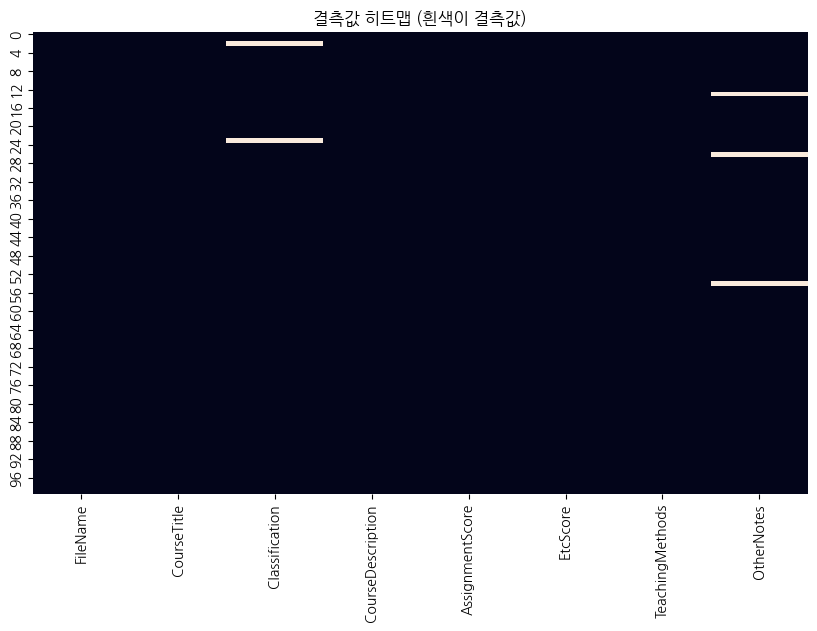

In [7]:
# 4. 결측값 확인
print("[컬럼별 결측값 개수]")
missing_values = df.isnull().sum()
print(missing_values)

# 시각적으로 결측값 확인 (선택 사항)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측값 히트맵 (흰색이 결측값)")
plt.show()

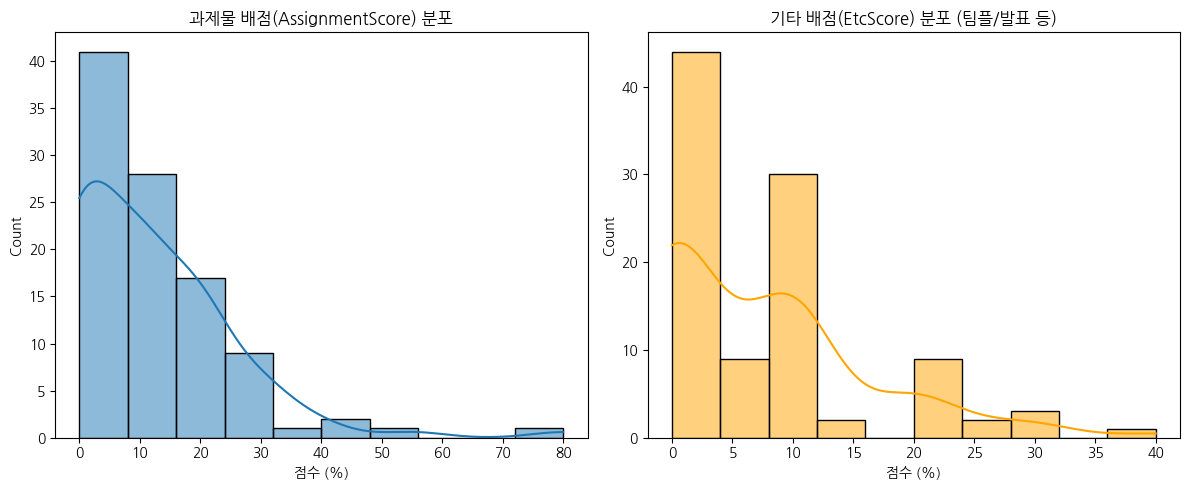

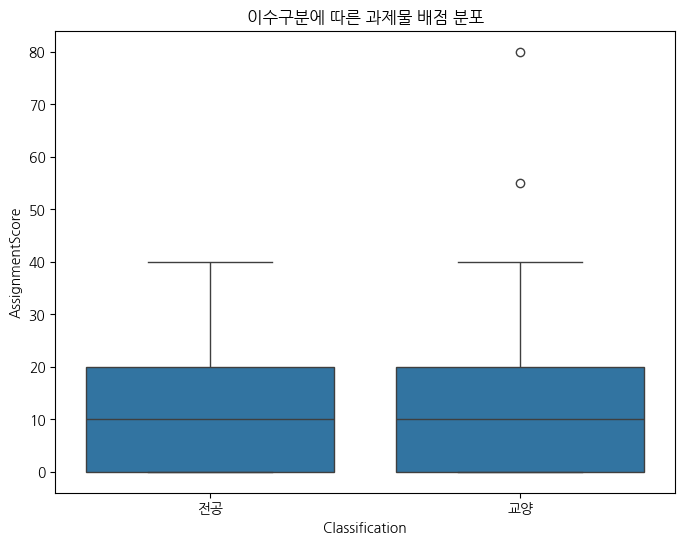

In [8]:
# 5. 시각화 - 분포 확인

# 5.1 AssignmentScore와 EtcScore 분포
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['AssignmentScore'], bins=10, kde=True)
plt.title('과제물 배점(AssignmentScore) 분포')
plt.xlabel('점수 (%)')

plt.subplot(1, 2, 2)
sns.histplot(df['EtcScore'], bins=10, kde=True, color='orange')
plt.title('기타 배점(EtcScore) 분포 (팀플/발표 등)')
plt.xlabel('점수 (%)')

plt.tight_layout()
plt.show()


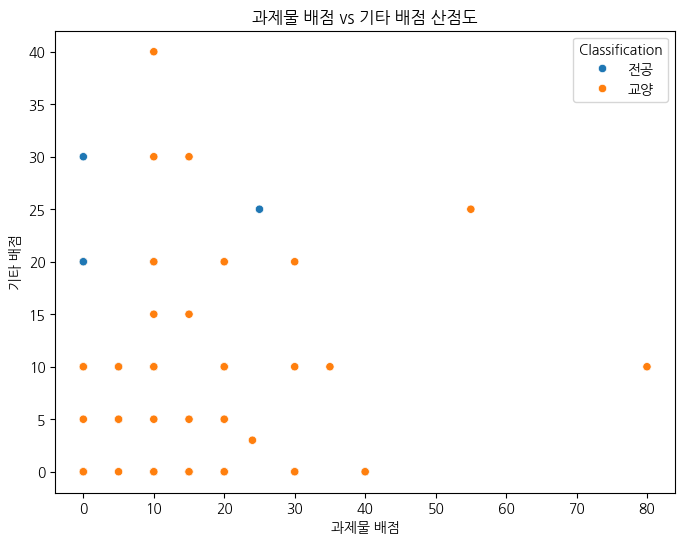

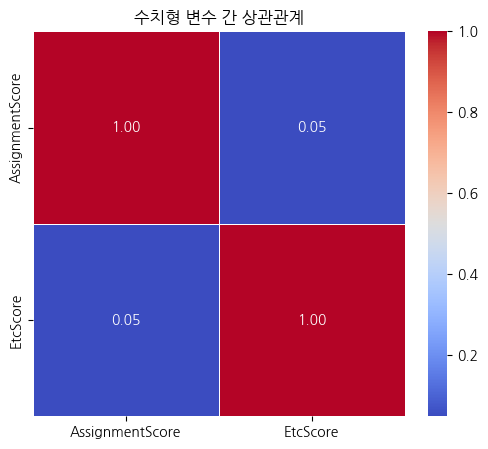

In [9]:
# 6. 시각화 - 관계 확인

# 6.1 과제 점수 vs 기타 점수 산점도
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AssignmentScore', y='EtcScore', hue='Classification', data=df)
plt.title('과제물 배점 vs 기타 배점 산점도')
plt.xlabel('과제물 배점')
plt.ylabel('기타 배점')
plt.show()

# 6.2 상관계수 행렬 (Heatmap)
corr_matrix = df[['AssignmentScore', 'EtcScore']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('수치형 변수 간 상관관계')
plt.show()